In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import StandardScaler
from pyod.models.knn import KNN


In [2]:
data = pd.read_csv("data.csv")

In [3]:
data

,EarthquakeDepth,M,Rrup,Rjb,lnPGA,lnPGV,lnVs30,Residual
0,0.70,3.8,103.12,103.18,-9.284901,-4.920720,6.008813,-0.907947
1,-0.87,4.3,102.84,102.38,-8.409455,-4.950523,6.184149,-0.946029
2,19.30,4.1,49.29,45.71,-8.063275,-4.007867,5.973810,-2.695649
3,10.83,3.8,323.08,323.04,-10.792681,-6.504918,6.565265,0.323998
4,15.21,4.0,186.09,185.64,-8.857286,-5.183250,6.436150,-0.160629
...,...,...,...,...,...,...,...,...
17315,10.24,3.5,132.76,132.46,-9.732823,-5.925528,5.817111,-0.789887
17316,10.16,4.5,120.18,119.98,-7.741425,-4.125994,6.285998,-0.944555
17317,6.00,4.4,230.48,230.64,-8.312861,-5.212017,6.373320,0.590802
17318,7.16,4.0,110.52,110.44,-8.720599,-4.557612,6.035481,-0.975789


1. 'residual' is only used for evaluating the performance
2. In reality, you don't have the residual; you have to select your own feature and transformation

In [4]:
X = data.drop('Residual', axis=1).to_numpy()

In [5]:
X

array([[  0.7       ,   3.8       , 103.12      , ...,  -9.28490109,
         -4.92071994,   6.00881319],
       [ -0.87      ,   4.3       , 102.84      , ...,  -8.40945537,
         -4.95052256,   6.18414889],
       [ 19.3       ,   4.1       ,  49.29      , ...,  -8.06327461,
         -4.00786733,   5.97380961],
       ...,
       [  6.        ,   4.4       , 230.48      , ...,  -8.31286079,
         -5.21201672,   6.37331979],
       [  7.16      ,   4.        , 110.52      , ...,  -8.72059937,
         -4.55761173,   6.03548143],
       [  6.2       ,   4.4       , 251.92      , ..., -11.05560917,
         -6.71438894,   6.00881319]])

standardization to avoid inconsistent metric

In [6]:
scaler = StandardScaler()
scaler.fit(X)
X_train = scaler.transform(X)

In [7]:
X_train

array([[-1.33774052e+00, -3.13729978e-01, -8.32338007e-01, ...,
        -4.12691857e-02,  1.41028265e-01, -5.76482426e-01],
       [-1.65383545e+00,  7.35023828e-01, -8.35564134e-01, ...,
         3.60606824e-01,  1.26705007e-01, -2.27921240e-02],
       [ 2.40707840e+00,  3.15522305e-01, -1.45256087e+00, ...,
         5.19522153e-01,  5.79748910e-01, -6.87019748e-01],
       ...,
       [-2.70668461e-01,  9.44774589e-01,  6.35088777e-01, ...,
         4.04948862e-01,  1.02985647e-03,  5.74588152e-01],
       [-3.71206140e-02,  1.05771544e-01, -7.47076087e-01, ...,
         2.17775226e-01,  3.15539534e-01, -4.92267122e-01],
       [-2.30401591e-01,  9.44774589e-01,  8.82117909e-01, ...,
        -8.54118101e-01, -7.21016290e-01, -5.76482426e-01]])

# KNN OD

In [8]:
mdl = KNN(contamination=0.1,n_neighbors=10)
mdl.fit(X_train)
label = mdl.labels_
score = mdl.decision_scores_
data['score'] = score
data['label'] = label

explore different hyperparameters on the results in a qualitative manner

! in practice, for unsupervised problems, you don't have a benchmark like 'residual'; sort to PCA/t-sne

In [9]:
data

,EarthquakeDepth,M,Rrup,Rjb,lnPGA,lnPGV,lnVs30,Residual,score,label
0,0.70,3.8,103.12,103.18,-9.284901,-4.920720,6.008813,-0.907947,0.492406,0
1,-0.87,4.3,102.84,102.38,-8.409455,-4.950523,6.184149,-0.946029,0.770124,0
2,19.30,4.1,49.29,45.71,-8.063275,-4.007867,5.973810,-2.695649,0.832438,0
3,10.83,3.8,323.08,323.04,-10.792681,-6.504918,6.565265,0.323998,0.618342,0
4,15.21,4.0,186.09,185.64,-8.857286,-5.183250,6.436150,-0.160629,0.667474,0
...,...,...,...,...,...,...,...,...,...,...
17315,10.24,3.5,132.76,132.46,-9.732823,-5.925528,5.817111,-0.789887,0.601458,0
17316,10.16,4.5,120.18,119.98,-7.741425,-4.125994,6.285998,-0.944555,0.682586,0
17317,6.00,4.4,230.48,230.64,-8.312861,-5.212017,6.373320,0.590802,0.598547,0
17318,7.16,4.0,110.52,110.44,-8.720599,-4.557612,6.035481,-0.975789,0.463224,0


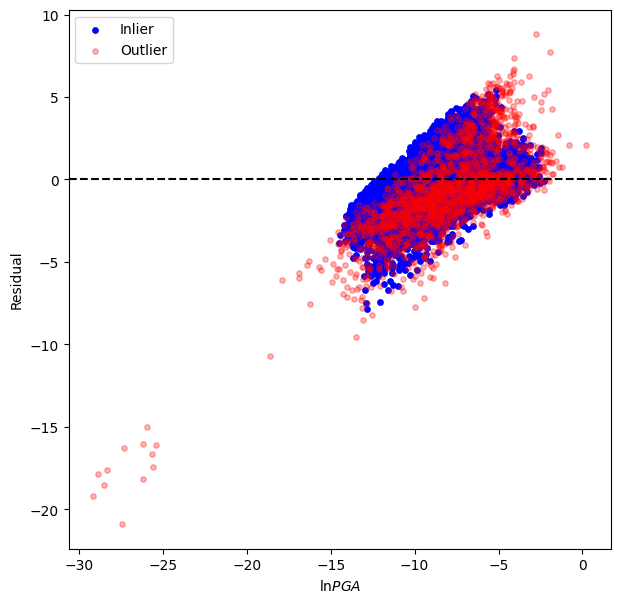

In [10]:
fig, ax = plt.subplots(figsize=(7,7))
outlier = data[data['label'] == 1]
inlier = data[data['label'] == 0]
ax.scatter(inlier['lnPGA'],inlier['Residual'],color='blue',label='Inlier',s=15,zorder=1,marker='o')
ax.scatter(outlier['lnPGA'],outlier['Residual'],color='red',label='Outlier',s=15,zorder=2,marker='o',alpha=0.3)
ax.axhline(0,color='k',ls='dashed')

ax.set_xlabel(r"ln$PGA$")
ax.set_ylabel('Residual')
ax.legend()